In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

Загружаем данные 

In [2]:
test = pd.read_csv('./files/x_test.csv', sep=';')
train = pd.read_csv('./files/x_train.csv', sep=';')
train_y = pd.read_csv('./files/y_train.csv', header = None)

In [83]:
test.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,13,7,2,9,18.000000,0,2,1.0,1565000,1125,16,1
1,3,4,1,4,8.000000,0,0,0.0,602000,900,9,1
2,42,8,3,24,24.714286,0,5,0.4,2196000,1375,17,4
3,39,5,4,13,26.250000,0,0,0.0,1353000,650,8,4
4,6,7,1,7,11.285714,0,2,1.0,1352000,1375,16,1


In [84]:
train.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


Зависимая переменная содержится в отдельном файле, объединим её независимыми переменными, чтобы посмотреть есть ли взаимосвязь между ними.  

In [3]:
df = pd.concat([train, train_y], axis=1)
df.columns = ['maxPlayerLevel',
                  'numberOfAttemptedLevels',
                'attemptsOnTheHighestLevel',
                       'totalNumOfAttempts',
       'averageNumOfTurnsPerCompletedLevel',
                    'doReturnOnLowerLevels',
                     'numberOfBoostersUsed',
                'fractionOfUsefullBoosters',
                               'totalScore',
                          'totalBonusScore',
                          'totalStarsCount',
               'numberOfDaysActuallyPlayed',
                                    'target']

Посмотрим на попарные соотношения между данными

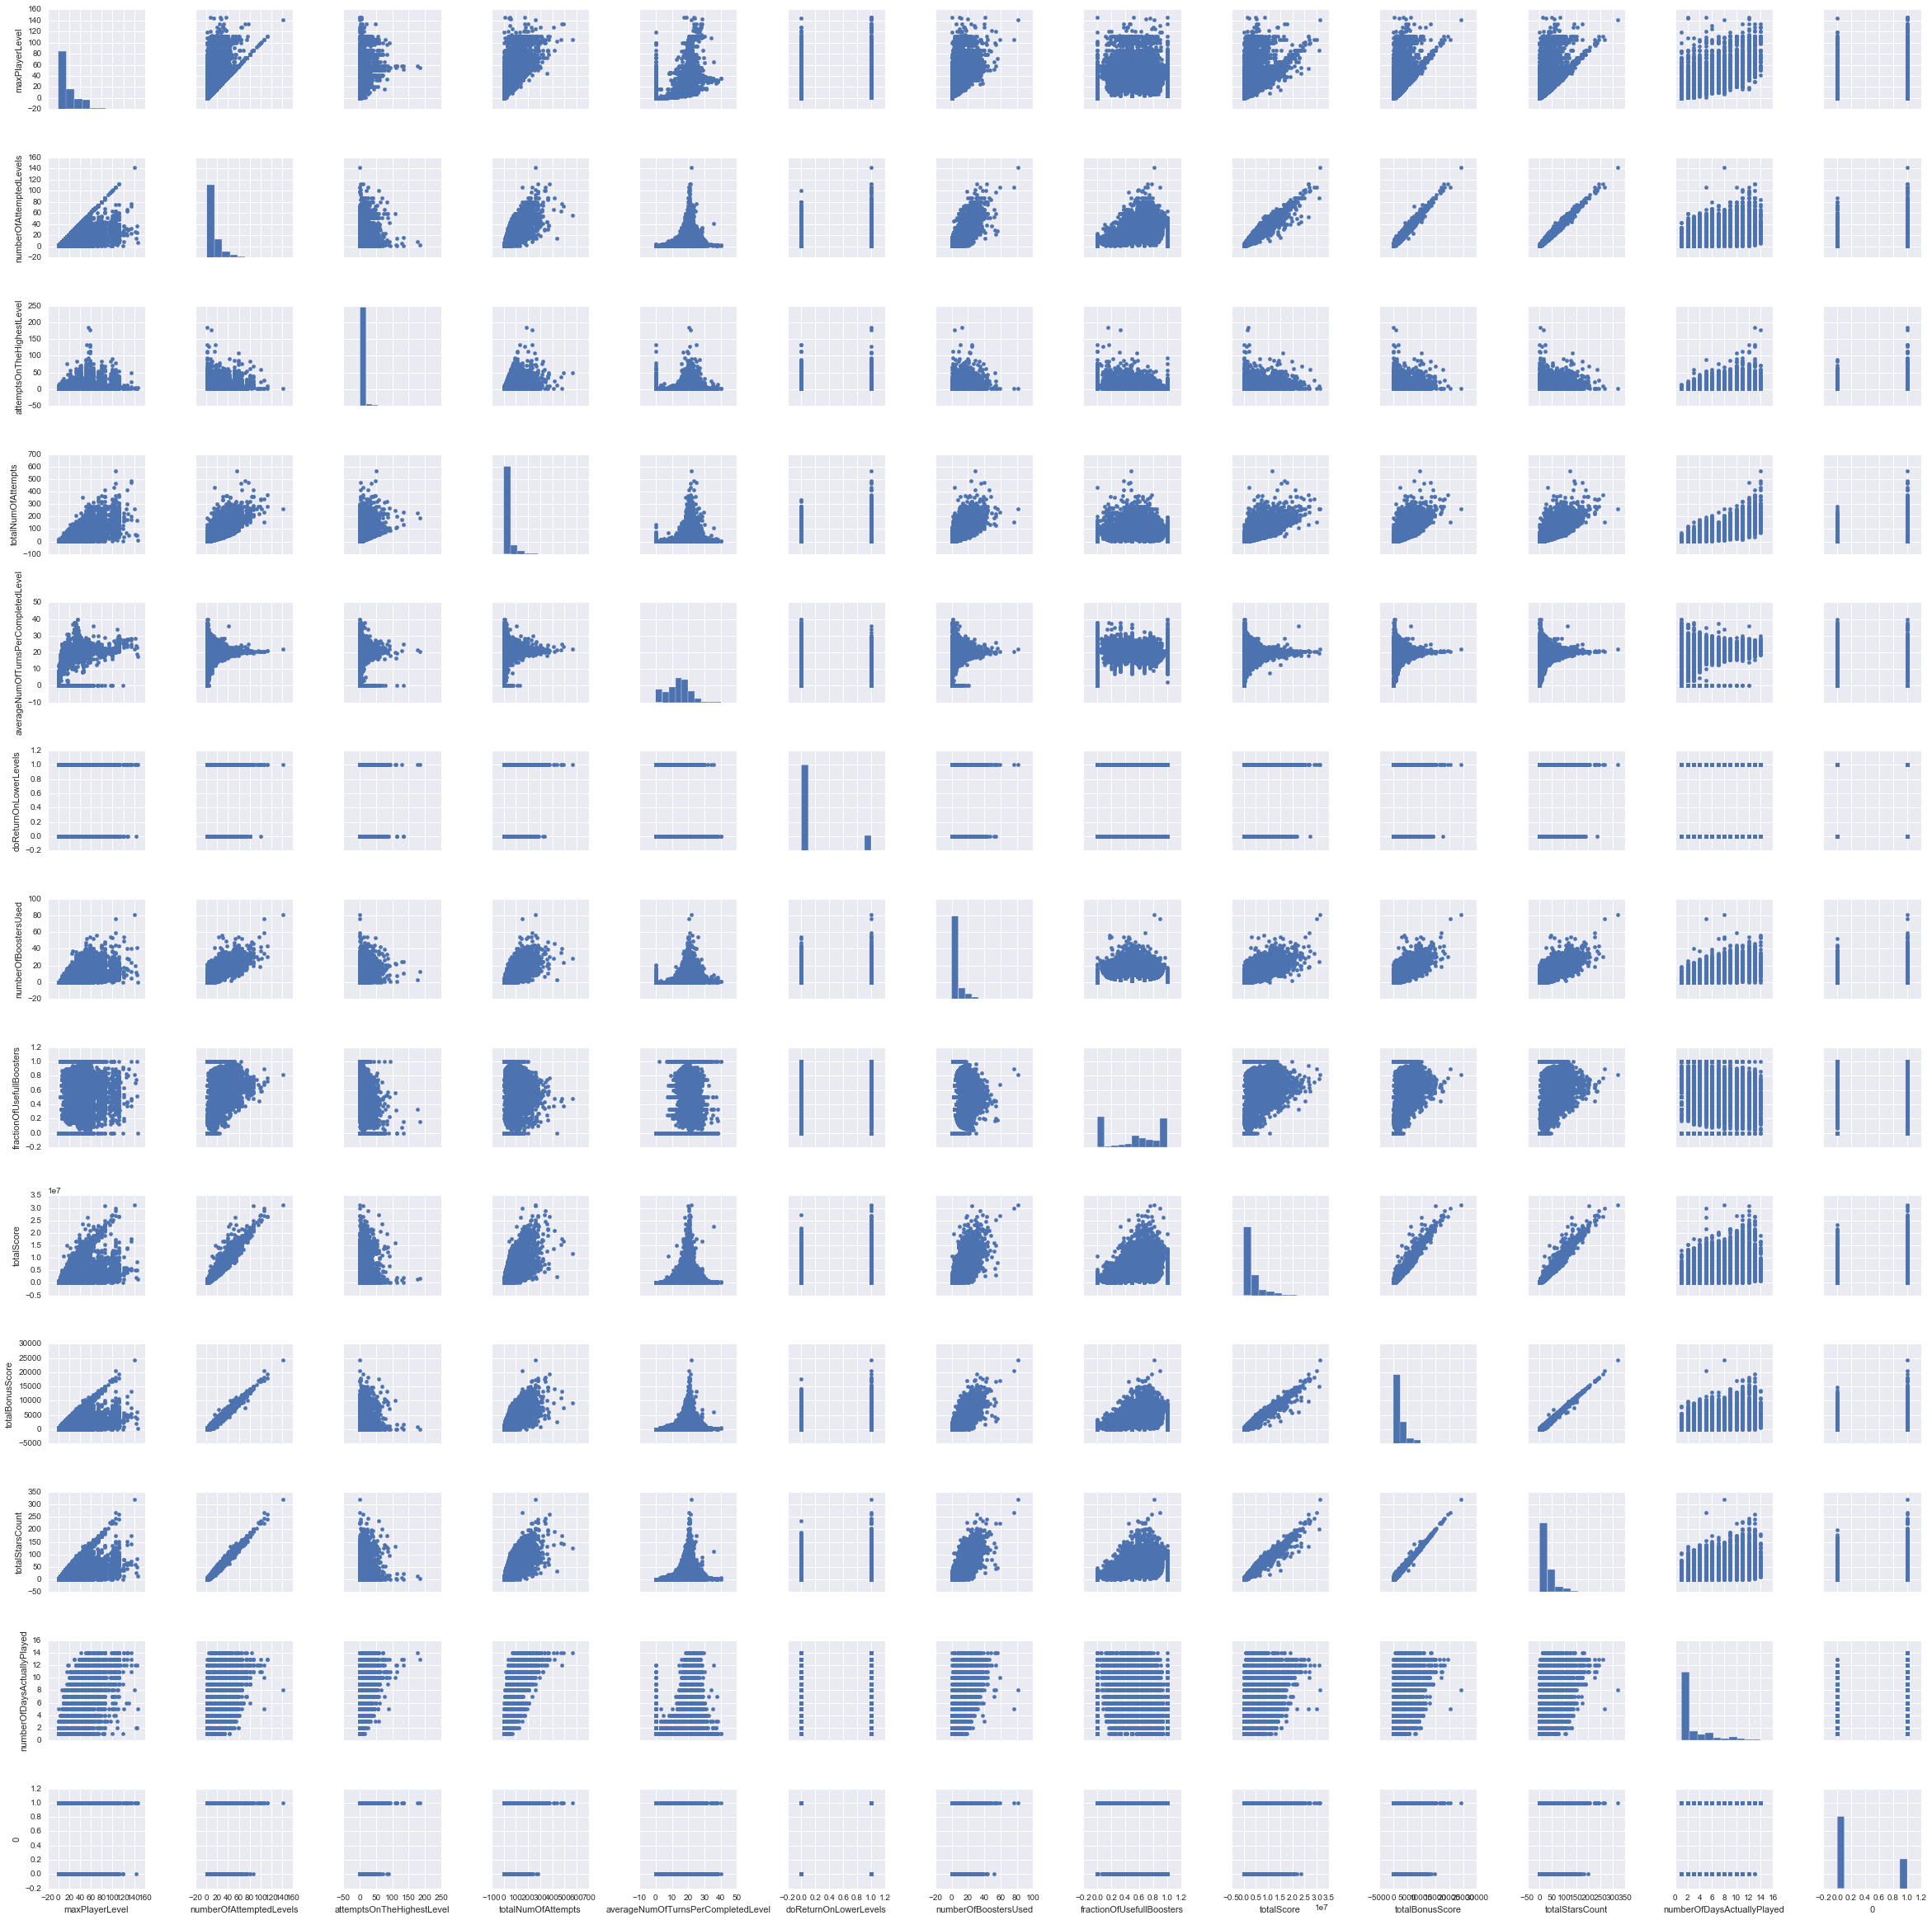

In [7]:
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

И на корреляцию между ними

C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


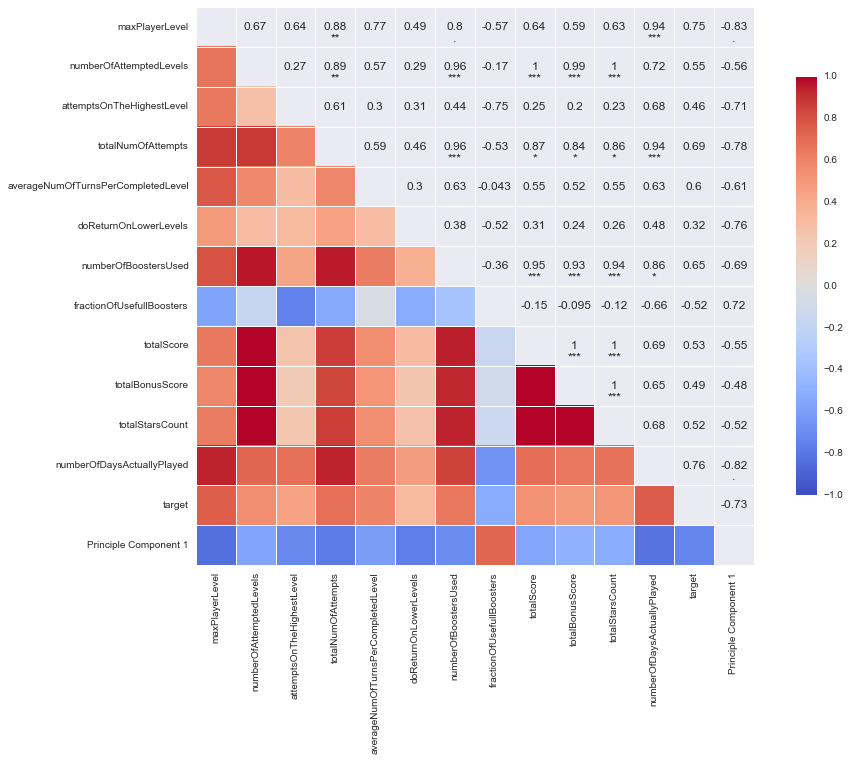

In [207]:
plt.figure(figsize=(15,10))
sns.corrplot(df.corr(),  diag_names=False)

Из графиков видно, что 'totalScore','totalBonusScore', 'totalStarsCount', очень сильно коррелируют между собой, а 'fractionOfUsefullBoosters' наоборот очень слабо коррелирует с остальными данными. На целевую переменную больше всего влияют 'maxPlayerLevel', и 'numberOfDaysActuallyPlayed'. 

Посмотрим различается ли разброс в тестовых и тренировочных данных

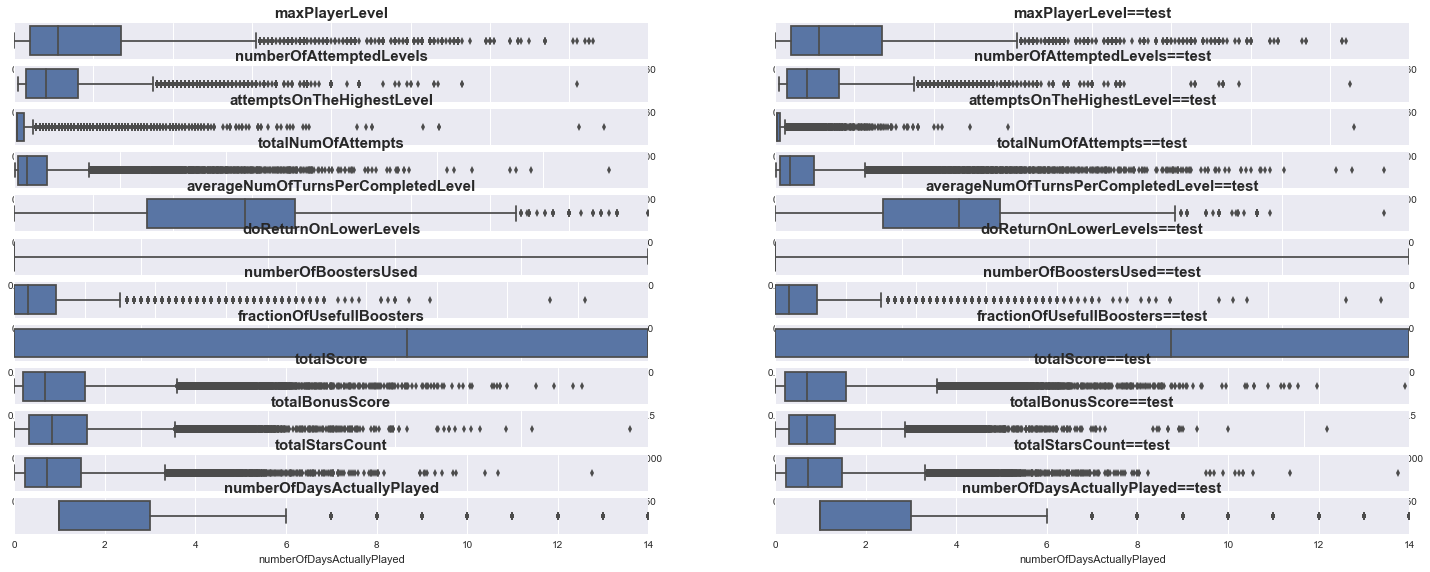

In [5]:
fig = plt.figure(figsize = (25, 20))
for i, x in zip(range(1,26,2), train.columns):
    plt.subplot(26, 2, i)
    sns.boxplot(train[x])
    plt.title(x, fontsize=15, fontweight='bold')

for i, x in zip(range(2,27,2), test.columns):
    plt.subplot(26, 2, i)
    sns.boxplot(test[x])
    plt.title(x +'==test', fontsize=15, fontweight='bold')

Как видим данные практически идентичны

Оценим какой разброс у данных в зависимости от целевой переменной

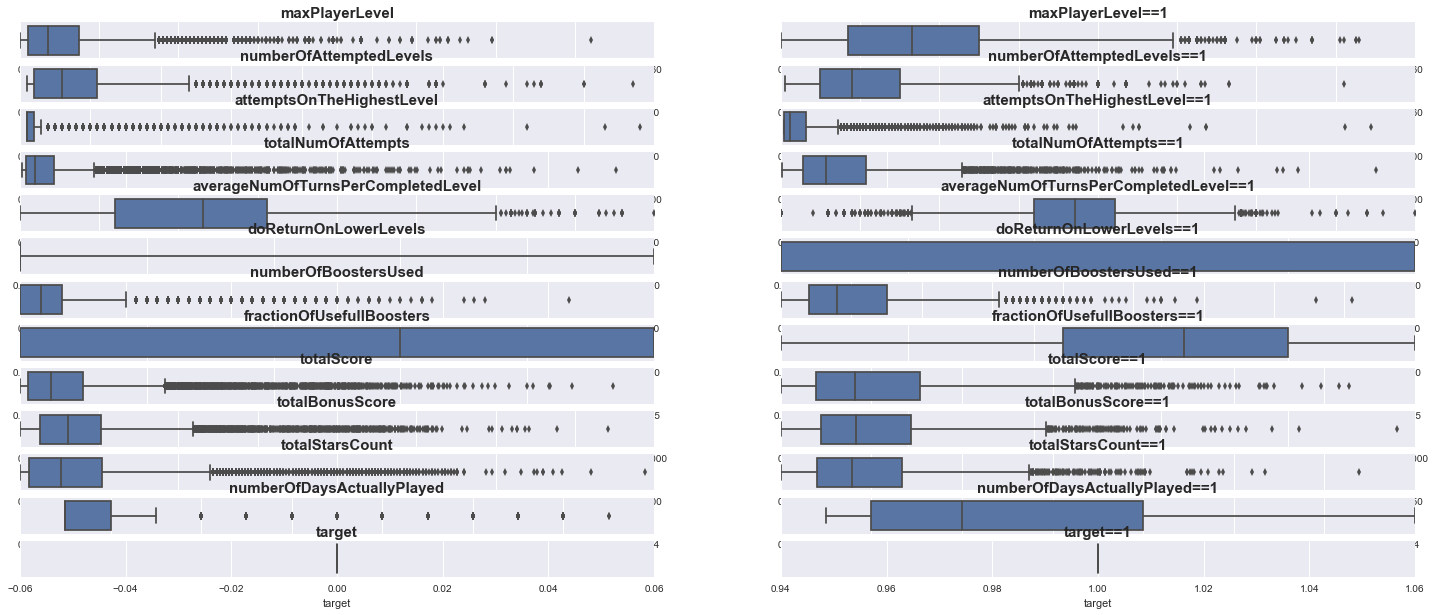

In [4]:
fig = plt.figure(figsize = (25, 20))
for i, x in zip(range(1,26,2), df.columns):
    plt.subplot(26, 2, i)
    sns.boxplot(df[df.target==0][x])
    plt.title(x, fontsize=15, fontweight='bold')

for i, x in zip(range(2,27,2), df.columns):
    plt.subplot(26, 2, i)
    sns.boxplot(df[df.target==1][x])
    plt.title(x +'==1', fontsize=15, fontweight='bold')

и как коррелируют данные в зависимости от класса 

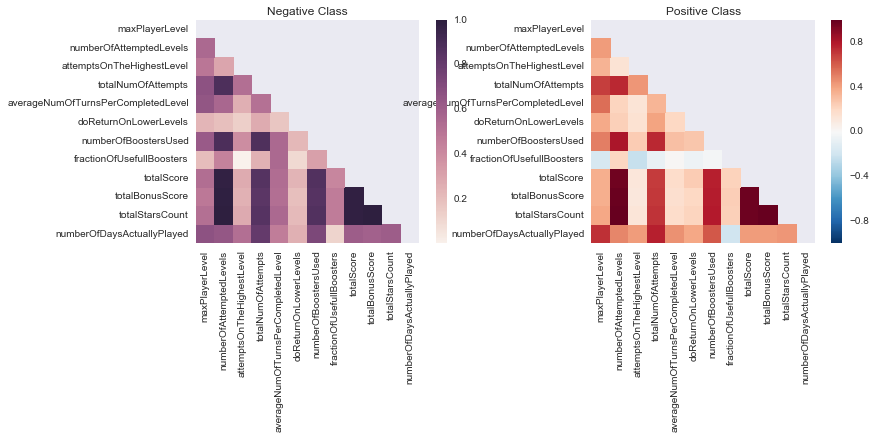

In [188]:
FIGSIZE = (13,4)
_, (ax1, ax2) = plt.subplots(1,2, figsize = FIGSIZE)
MIN_PERIODS = 100

triang_mask = np.zeros((X_pos.shape[1], X_pos.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = True

ax1.set_title('Negative Class')
sns.heatmap(X_neg.corr(min_periods = MIN_PERIODS), 
            mask = triang_mask, square=True,  ax = ax1)

ax2.set_title('Positive Class')
sns.heatmap(X_pos.corr(min_periods = MIN_PERIODS), 
            mask = triang_mask, square=True,  ax = ax2)

Выведем пары признаков с самой высокой корреляцией 

In [191]:
# print feature pairs with highest correlation
triang_mask = np.ones((X_pos.shape[1], X_pos.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = 0

diff_corr = np.multiply((X_neg.corr() - X_pos.corr()).values, triang_mask)
sorted_idx = np.dstack(np.unravel_index(np.argsort(diff_corr.ravel()), diff_corr.shape))[0, ::-1]

pairs = []
for idx in sorted_idx[:36]:
    pairs.append((df.columns[idx[0]], df.columns[idx[1]]))
    print("{} : {}".format(pairs[-1][0], pairs[-1][1]))
    


fractionOfUsefullBoosters : averageNumOfTurnsPerCompletedLevel
totalStarsCount : averageNumOfTurnsPerCompletedLevel
fractionOfUsefullBoosters : maxPlayerLevel
totalBonusScore : averageNumOfTurnsPerCompletedLevel
totalScore : averageNumOfTurnsPerCompletedLevel
averageNumOfTurnsPerCompletedLevel : numberOfAttemptedLevels
fractionOfUsefullBoosters : numberOfBoostersUsed
fractionOfUsefullBoosters : totalNumOfAttempts
numberOfDaysActuallyPlayed : fractionOfUsefullBoosters
numberOfBoostersUsed : averageNumOfTurnsPerCompletedLevel
totalStarsCount : fractionOfUsefullBoosters
fractionOfUsefullBoosters : attemptsOnTheHighestLevel
fractionOfUsefullBoosters : numberOfAttemptedLevels
totalBonusScore : fractionOfUsefullBoosters
totalScore : fractionOfUsefullBoosters
numberOfDaysActuallyPlayed : totalScore
averageNumOfTurnsPerCompletedLevel : totalNumOfAttempts
numberOfDaysActuallyPlayed : totalStarsCount
totalScore : maxPlayerLevel
numberOfDaysActuallyPlayed : totalBonusScore
numberOfDaysActuallyPla

Учтем данную информацию при Feature Engineering